In [52]:
import zipfile
import os
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import gensim
import gensim.corpora as corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
!pip install ruwordnet
!ruwordnet download
from ruwordnet import RuWordNet
wordnet = RuWordNet()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
downloading a ruwordnet model from https://github.com/avidale/python-ruwordnet/releases/download/0.0.4/ruwordnet-2021.db


Получаем тексты из папки

In [2]:
with zipfile.ZipFile('LingCorp.zip', 'r') as file:
  file.extractall('LingCorp')

Загружаем список стоп-слов

In [7]:
swl = []
with open('swl_optimum.txt', 'r', encoding='utf-8') as file:
  for line in file:
    line = line.replace('\n', '')
    swl.append(line)

Смотрим, что за тексты есть у нас в корпусе

In [10]:
corpus = []
for file in os.listdir('/content/LingCorp/LingCorp'):
  text = open(os.path.join('/content/LingCorp/LingCorp', file), 'r', encoding='utf-8').read()
  corpus.append(text)

In [11]:
corpus

["АКТИВНАЯ КОНСТРУКЦИЯ\tАКТИВНАЯ КОНСТРУКЦИЯ, один из нескольких зафиксированных в языках мира способов кодирования именных групп в элементарном предложении, которые обозначают главных участников ситуации, описываемой глаголом-сказуемым.\nПонятие активной конструкции и языка активного типа (или активного строя) сформировалось сравнительно недавно, на фоне усилившегося интереса к эргативным языкам (см. ЭРГАТИВНАЯ КОНСТРУКЦИЯ) в их противопоставлении языкам с привычной конструкцией предложения европейского типа (см. АККУЗАТИВНАЯ КОНСТРУКЦИЯ). В ряде языков, которые в предложении с переходным глаголом кодируют семантические роли агенса (наделенного волей, контролирующего событие и активно его инициирующего участника, который несет ответственность за данное событие) и пациенса (не проявляющего воли, неактивного и не контролирующего событие участника, который отражает изменения, возникающие в ходе данного события) аналогично языкам с эргативной конструкцией, в предложении с непереходным гла

Предобработка текста

In [23]:
def preprocess_data(document):
    #Пунктуация
    punct = re.compile("[^\w\s]")
    #Избавляемся от пунктуации
    file_without_punct = re.sub(punct, "", document)
    #Приводим к нижнему регистру
    file_without_punct = file_without_punct.lower()
    #Токенизируем
    info_tokenized = word_tokenize(file_without_punct)
    #Лемматизируем
    info_lemmatized = []
    for token in info_tokenized:
        lemma = morph.parse(token)[0]
        lemma = lemma.normal_form
        info_lemmatized.append(lemma)
    #Фильтруем от стоп-слов
    processed_document = []
    for lemma in info_lemmatized:
        if lemma not in swl:
            processed_document.append(lemma)
    return processed_document

In [24]:
corpus_processed = []
for file in corpus:
  new_file = preprocess_data(file)
  corpus_processed.append(new_file)

In [25]:
corpus_processed

[['активный',
  'конструкция',
  'активный',
  'конструкция',
  'несколько',
  'зафиксировать',
  'язык',
  'мир',
  'способ',
  'кодирование',
  'именной',
  'группа',
  'элементарный',
  'предложение',
  'обозначать',
  'главный',
  'участник',
  'ситуация',
  'описывать',
  'глаголомсказовать',
  'понятие',
  'активный',
  'конструкция',
  'язык',
  'активный',
  'тип',
  'активный',
  'строй',
  'сформироваться',
  'сравнительно',
  'недавно',
  'усилиться',
  'интерес',
  'эргативный',
  'язык',
  'смотреть',
  'эргативный',
  'конструкция',
  'противопоставление',
  'язык',
  'привычный',
  'конструкция',
  'предложение',
  'европейский',
  'тип',
  'смотреть',
  'аккузативный',
  'конструкция',
  'ряд',
  'язык',
  'предложение',
  'переходный',
  'глагол',
  'кодировать',
  'семантический',
  'роль',
  'агенс',
  'наделить',
  'воля',
  'контролировать',
  'событие',
  'активно',
  'инициировать',
  'участник',
  'нести',
  'ответственность',
  'событие',
  'пациенс',
  'проявл

Составляем словарь

In [28]:
id2word = corpora.Dictionary(corpus_processed)
texts = corpus_processed
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 2), (13, 6), (14, 15), (15, 1), (16, 1), (17, 1), (18, 20), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 2), (40, 1), (41, 16), (42, 1), (43, 1), (44, 1), (45, 2), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 4), (52, 2), (53, 1), (54, 1), (55, 2), (56, 2), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 3), (71, 1), (72, 1), (73, 11), (74, 4), (75, 1), (76, 12), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 2), (11

In [30]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('actor', 1),
  ('aqunva', 1),
  ('aqunvu', 1),
  ('aqunza', 1),
  ('aqunzu', 1),
  ('rurcwunva', 1),
  ('rurcwunzavu', 1),
  ('undergoer', 1),
  ('zu', 1),
  ('австронезийский', 1),
  ('агенс', 2),
  ('агенсоподобный', 1),
  ('агентивный', 2),
  ('аккузативный', 6),
  ('актант', 15),
  ('актантный', 1),
  ('актантомпредложение', 1),
  ('активно', 1),
  ('активный', 20),
  ('актор', 2),
  ('александр', 1),
  ('аналогично', 1),
  ('аналогичный', 1),
  ('антипассив', 1),
  ('ачинский', 1),
  ('бацбийский', 1),
  ('блокировать', 1),
  ('бояться', 1),
  ('бразилия', 1),
  ('ведущий', 2),
  ('внимание', 1),
  ('возможность', 1),
  ('возникать', 1),
  ('воля', 2),
  ('вопервое', 1),
  ('время', 1),
  ('встречаться', 1),
  ('выбор', 3),
  ('гиперролевый', 1),
  ('гиперроль', 2),
  ('главный', 1),
  ('глагол', 16),
  ('глаголомсказовать', 1),
  ('глагольный', 1),
  ('грамматический', 1),
  ('группа', 2),
  ('два', 2),
  ('дело', 1),
  ('диатезный', 1),
  ('достаточно', 1),
  ('европейский', 

Строим модель LDA

In [32]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Высчитываем метрики

In [36]:
#Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

#Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus_processed, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.49765391618745

Coherence Score:  0.4064497395529195


Смотрим получившиеся темы

In [38]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.001*"лексема" + 0.001*"язык" + 0.001*"слово" + 0.001*"быть" + 0.001*"имя" '
  '+ 0.001*"семиотика" + 0.000*"значение" + 0.000*"текст" + 0.000*"др" + '
  '0.000*"понятие"'),
 (1,
  '0.027*"лексема" + 0.027*"язык" + 0.015*"слово" + 0.011*"типология" + '
  '0.010*"грамматический" + 0.008*"глагол" + 0.008*"конструкция" + '
  '0.008*"значение" + 0.007*"тип" + 0.007*"форма"'),
 (2,
  '0.042*"слово" + 0.036*"язык" + 0.018*"русский" + 0.010*"заимствование" + '
  '0.009*"греческий" + 0.008*"значение" + 0.007*"тп" + 0.007*"заимствовать" + '
  '0.007*"новый" + 0.006*"малаялам"'),
 (3,
  '0.025*"язык" + 0.015*"китайский" + 0.012*"слово" + 0.010*"тон" + '
  '0.009*"диалект" + 0.009*"быть" + 0.009*"иероглиф" + 0.006*"система" + '
  '0.005*"мочь" + 0.005*"ирония"'),
 (4,
  '0.031*"язык" + 0.017*"семиотика" + 0.009*"школа" + 0.008*"быть" + '
  '0.007*"знак" + 0.007*"семиотический" + 0.007*"наука" + 0.007*"др" + '
  '0.006*"активный" + 0.006*"лингвистика"'),
 (5,
  '0.025*"текст" + 0.016*"под

Визуализируем их

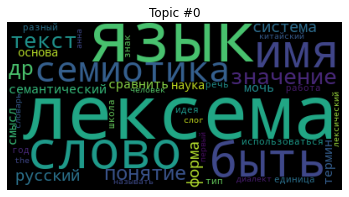

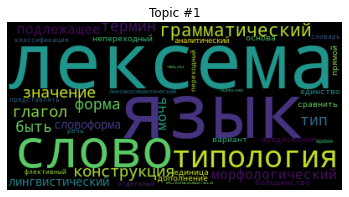

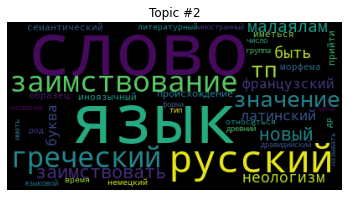

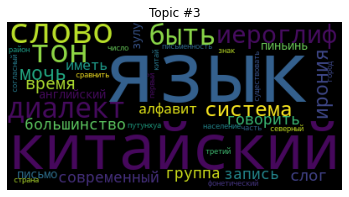

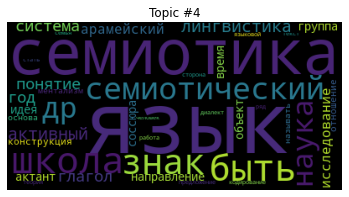

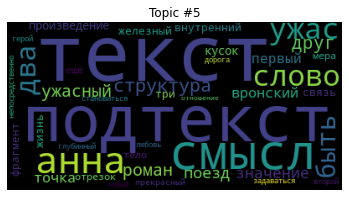

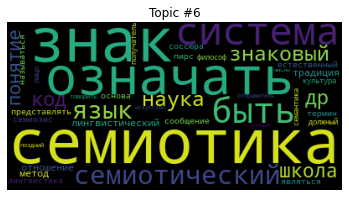

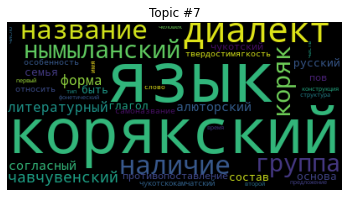

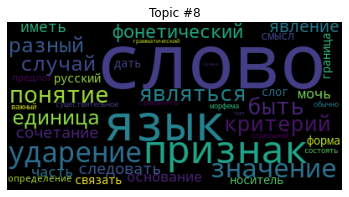

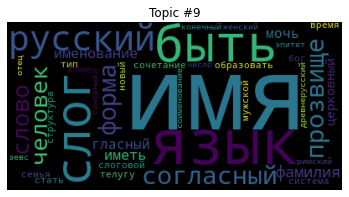

In [44]:
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 40))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

Смотрим значения некоторых из ключевых слов в WordNet

In [62]:
for sense in wordnet.get_senses('слово'):
  print(sense.synset)

Synset(id="3264-N", title="СЛОВО ЯЗЫКА")
Synset(id="107257-N", title="ВЫСКАЗЫВАНИЕ (ТО, ЧТО ВЫСКАЗАНО)")


In [63]:
w = wordnet.get_senses('слово')[0].synset.hypernyms[0]
w

Synset(id="153483-N", title="ЕДИНИЦА ЯЗЫКА")

In [64]:
w.hyponyms

[Synset(id="114472-N", title="ГРАММАТИЧЕСКАЯ ОСНОВА"),
 Synset(id="3264-N", title="СЛОВО ЯЗЫКА"),
 Synset(id="107521-N", title="ЯЗЫКОВОЕ ВЫРАЖЕНИЕ"),
 Synset(id="110610-N", title="МОРФЕМА"),
 Synset(id="115235-N", title="СЛОГ СЛОВА")]

In [65]:
wordnet.get_senses('слово')

[Sense(id="3264-N-111602", name="СЛОВО"),
 Sense(id="107257-N-747793", name="СЛОВА")]

In [66]:
for sense in wordnet.get_senses('текст'):
  print(sense.synset)

Synset(id="2966-N", title="ТЕКСТ")


In [67]:
w = wordnet.get_senses('текст')[0].synset.hypernyms[0]
w

Synset(id="112114-N", title="ЗАПИСЬ (ТО, ЧТО ЗАПИСАНО)")

In [68]:
w.hyponyms

[Synset(id="9573-N", title="ФАЙЛ (НОСИТЕЛЬ ИНФОРМАЦИИ)"),
 Synset(id="154750-N", title="ПОСТ В БЛОГЕ"),
 Synset(id="149957-N", title="ОТМЕТКА О РЕГИСТРАЦИИ"),
 Synset(id="142082-N", title="ЗАМЕТКИ ДЛЯ ПАМЯТИ"),
 Synset(id="143326-N", title="СЧЕТ (УЧЕТНАЯ ЗАПИСЬ)"),
 Synset(id="155567-N", title="АККАУНТ ПОЛЬЗОВАТЕЛЯ"),
 Synset(id="106989-N", title="ПИСЬМЕННЫЙ ПЕРЕЧЕНЬ, СПИСОК"),
 Synset(id="140574-N", title="ДНЕВНИК (КАЖДОДНЕВНЫЕ ЗАПИСИ ПРОИСХОДЯЩЕГО)"),
 Synset(id="5007-N", title="СТЕНОГРАММА"),
 Synset(id="153904-N", title="АУДИОЗАПИСЬ, ФОНОГРАММА"),
 Synset(id="153905-N", title="ВИДЕОЗАПИСЬ"),
 Synset(id="513-N", title="КОМПЬЮТЕРНАЯ ПРОГРАММА"),
 Synset(id="4527-N", title="ДЕБЕТ СЧЕТА"),
 Synset(id="148447-N", title="ХИМИЧЕСКОЕ УРАВНЕНИЕ"),
 Synset(id="2966-N", title="ТЕКСТ"),
 Synset(id="110671-N", title="МАТЕМАТИЧЕСКОЕ ВЫРАЖЕНИЕ"),
 Synset(id="123872-N", title="ПРОТОКОЛ ЗАСЕДАНИЯ, БЕСЕДЫ"),
 Synset(id="148581-N", title="БУХГАЛТЕРСКАЯ ЗАПИСЬ"),
 Synset(id="147575-N", title="ФОРМУЛА 

In [69]:
wordnet.get_senses('текст')

[Sense(id="2966-N-112589", name="ТЕКСТ")]

In [74]:
for sense in wordnet.get_senses('знак'):
  print(sense.synset)

Synset(id="151773-N", title="ЗНАК (ПРЕДМЕТ)")
Synset(id="107519-N", title="ЗНАК, ОБОЗНАЧЕНИЕ")
Synset(id="118639-N", title="ЗНАК РУКОЙ")


In [75]:
w = wordnet.get_senses('знак')[0].synset.hypernyms[0]
w

Synset(id="106554-N", title="ПРЕДМЕТ, ВЕЩЬ")

In [76]:
w.hyponyms

[Synset(id="120131-N", title="ВЕНОК, ВЕНЕЦ"),
 Synset(id="124546-N", title="ОПАХАЛО"),
 Synset(id="109620-N", title="ДЕТСКАЯ ИГРУШКА"),
 Synset(id="150448-N", title="ПОДКЛАДКА (ПРЕДМЕТ)"),
 Synset(id="126012-N", title="МАГНИТ"),
 Synset(id="10270-N", title="РИТУАЛЬНЫЕ ПРИНАДЛЕЖНОСТИ"),
 Synset(id="127210-N", title="ОБНОВКА (НОВАЯ ВЕЩЬ)"),
 Synset(id="132712-N", title="РЕЛИГИОЗНАЯ СВЯТЫНЯ"),
 Synset(id="121150-N", title="ВКЛАДЫШ"),
 Synset(id="123868-N", title="ЗАВЯЗКА (ТО,ЧЕМ ЗАВЯЗЫВАЮТ)"),
 Synset(id="149420-N", title="НАХОДКА, НАЙДЕННАЯ ВЕЩЬ"),
 Synset(id="129232-N", title="ПАМЯТНЫЙ СУВЕНИР"),
 Synset(id="120613-N", title="ГРУЗ (ТЯЖЕЛЫЙ ПРЕДМЕТ)"),
 Synset(id="126673-N", title="НАКЛАДКА, НАКЛАДНАЯ ЧАСТЬ"),
 Synset(id="130811-N", title="ДЕРЕВЯШКА (БРУСОК ИЛИ НЕБОЛЬШОЕ ИЗДЕЛИЕ ИЗ ДЕРЕВА)"),
 Synset(id="111705-N", title="ЛИСТ (ПЛАСТ)"),
 Synset(id="152860-N", title="ЯЙЦО (ПРЕДМЕТ)"),
 Synset(id="125158-N", title="БАНДУРА (ГРОМОЗДКИЙ И НЕСКЛАДНЫЙ ПРЕДМЕТ)"),
 Synset(id="107466-N", title=

In [77]:
wordnet.get_senses('знак')

[Sense(id="151773-N-138817", name="ЗНАК"),
 Sense(id="107519-N-138817", name="ЗНАК"),
 Sense(id="118639-N-138817", name="ЗНАК")]